# Improving classification datasets

In [1]:
%config InlineBackend.figure_format='retina'
from ekorpkit import eKonf

eKonf.setLogger("WARNING")
print("version:", eKonf.__version__)
print("is notebook?", eKonf.is_notebook())
print("is colab?", eKonf.is_colab())
print("environment variables:")
eKonf.print(eKonf.env().dict())

version: 0.1.38+26.g3d56094.dirty
is notebook? True
is colab? False
environment variables:
{'CUDA_DEVICE_ORDER': None,
 'CUDA_VISIBLE_DEVICES': None,
 'EKORPKIT_CONFIG_DIR': '/workspace/projects/ekorpkit-book/config',
 'EKORPKIT_DATA_DIR': None,
 'EKORPKIT_LOG_LEVEL': 'WARNING',
 'EKORPKIT_PROJECT': 'ekorpkit-book',
 'EKORPKIT_WORKSPACE_ROOT': '/workspace',
 'KMP_DUPLICATE_LIB_OK': 'TRUE',
 'NUM_WORKERS': 230}


In [2]:
data_dir = "../data/cointax"

## Building `cointax_polarity` dataset

In [3]:
raw_data = eKonf.load_data("cointax.csv", data_dir)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   긍정      478 non-null    object
 1   부정      236 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


In [4]:
import numpy as np
data = []
for polarity, rows in raw_data.to_dict().items():
    data += [dict(text=text, labels=polarity) for text in rows.values() if text is not np.NaN]
data = eKonf.records_to_dataframe(data)
eKonf.save_data(data, "cointax_rawdata.parquet", data_dir)
data

,text,labels
0,가상자산을 안해서,긍정
1,기타 자산과 동일하게 적용,긍정
2,그냥 저냥,긍정
3,부당이익에 대한 해소,긍정
4,땀흘려 일하지 않고 쉽게 돈 벌려는 사회적인 풍토를 근절해야 된다고 생각해서,긍정
...,...,...
709,소득과세가 너누 높다,부정
710,주식 거래세 수수료보다도 너무 높다고 생각하기에,부정
711,너무 심하다고 생각,부정
712,......,부정


In [5]:
cfg = eKonf.compose("dataset=dataset_build")
cfg.name = "cointax_polarity_kr"
cfg.data_dir = data_dir
cfg.data_file = "cointax_rawdata.parquet"
cfg.force.build = True
cfg.pipeline.split_sampling.stratify_on = "labels"
cfg.pipeline.split_sampling.random_state = 1234
cfg.pipeline.split_sampling.test_size = 0.2
cfg.pipeline.split_sampling.dev_size = 0.1
cfg.pipeline.reset_index.drop_index = False
cfg.verbose = False
cointax_polarity_ds = eKonf.instantiate(cfg)
cointax_polarity_ds.persist()

INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env
INFO:ekorpkit.base:setting environment variable CACHED_PATH_CACHE_ROOT to /workspace/.cache/cached_path
INFO:ekorpkit.base:setting environment variable KMP_DUPLICATE_LIB_OK to TRUE
INFO:ekorpkit.base:Applying pipe: functools.partial(<function load_dataframe at 0x7f86d4c3d040>)
INFO:ekorpkit.base:Applying pipe: functools.partial(<function reset_index at 0x7f86d4c3c280>)
INFO:ekorpkit.base:Applying pipe: functools.partial(<function split_sampling at 0x7f86d4c34e50>)
INFO:ekorpkit.base:Using batcher with minibatch size: 3


apply len_bytes to num_bytes:   0%|          | 0/171 [00:00<?, ?it/s]

INFO:ekorpkit.base:Using batcher with minibatch size: 1


apply len_bytes to num_bytes:   0%|          | 0/58 [00:00<?, ?it/s]

INFO:ekorpkit.base:Using batcher with minibatch size: 1


apply len_bytes to num_bytes:   0%|          | 0/143 [00:00<?, ?it/s]

## Loading `cointax_polarity` dataset

In [7]:
ds_cfg = eKonf.compose('dataset')
ds_cfg.name = 'cointax_polarity_kr'
ds_cfg.data_dir = data_dir
ds = eKonf.instantiate(ds_cfg)
labels = list(ds.splits['train'].labels.unique())
print(labels)

['긍정', '부정 ']


In [11]:
ds.data.head(1)

,id,text,labels,split
0,445,긍정,긍정,train


## Cross validation of `cointax_polarity_kr` dataset

INFO:ekorpkit.base:Calling train
Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-disc

  0%|          | 0/513 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


wandb: Currently logged in as: entelecheia. Use `wandb login --relogin` to force relogin


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/17 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/143 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

acc,▁█
eval_loss,█▁
fn,█▁
fp,▁▁
global_step,▁█
mcc,▁█
tn,▁▁
tp,▁█
train_loss,▁█
acc,0.75862
eval_loss,0.50016


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


INFO:ekorpkit.base:Calling eval


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Accuracy:  0.7832167832167832
Precison:  0.7998323990059527
Recall:  0.7832167832167832
F1 Score:  0.7564319738232782
Model Report: 
___________________________________________________
              precision    recall  f1-score   support

          긍정       0.77      0.97      0.86        96
         부정        0.86      0.40      0.55        47

    accuracy                           0.78       143
   macro avg       0.82      0.69      0.70       143
weighted avg       0.80      0.78      0.76       143



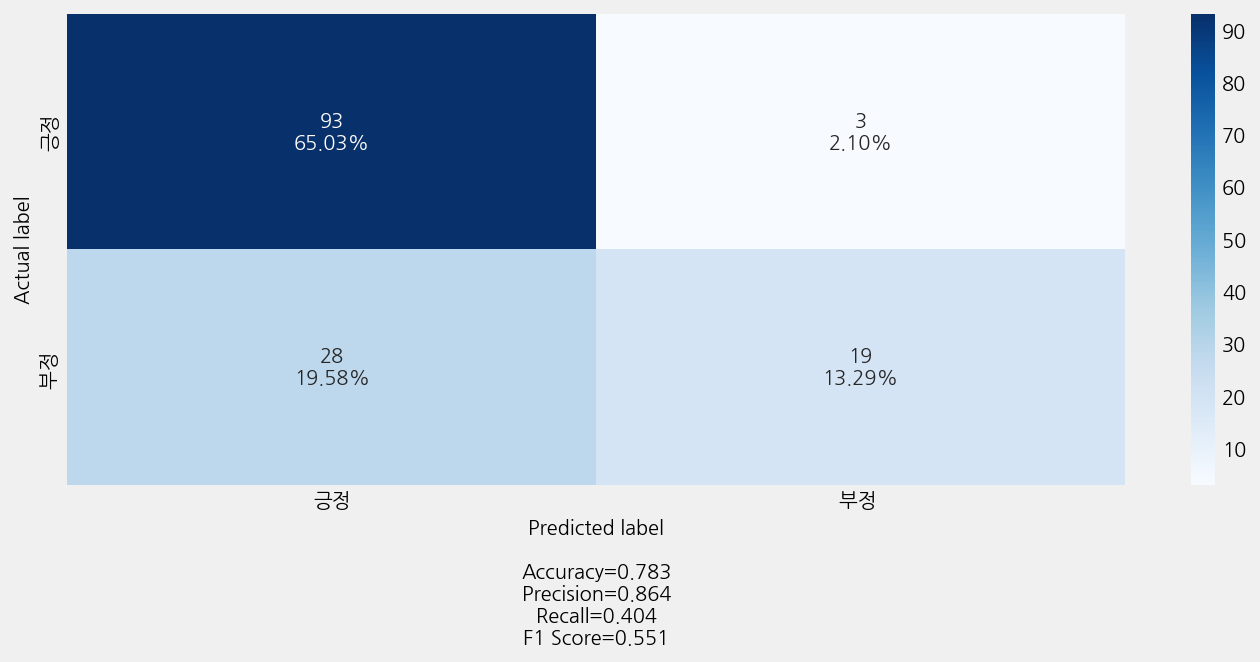

In [10]:
overrides=[
    '+model/transformer=classification',
    '+model/transformer/pretrained=ekonelectra-base',
]
model_cfg = eKonf.compose('model/transformer=classification', overrides)
model_cfg.name = "cointax_polarity_kr"
model_cfg.dataset = ds_cfg
model_cfg.verbose = False
model_cfg.config.num_train_epochs = 2
model_cfg.config.max_seq_length = 256
model_cfg.config.train_batch_size = 32
model_cfg.config.eval_batch_size = 32
model_cfg._method_ = ['train', 'eval']
# model_cfg.model.eval.visualize.plot.confusion_matrix.include_values = False
# model_cfg.model.eval.visualize.plot.confusion_matrix.include_percentages = False
# model_cfg.model.eval.visualize.plot.figure.figsize = (12,10)
model = eKonf.instantiate(model_cfg)

In [12]:
cv_preds = model.cross_val_predict(cv=5)
eKonf.save_data(cv_preds, "cointax_polarity_kr_cv_preds.parquet", data_dir)

Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-discriminator and are newly initializ

  0%|          | 0/456 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/143 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

acc,▁█
eval_loss,█▁
fn,█▁
fp,▁█
global_step,▁█
mcc,▁█
tn,█▁
tp,▁█
train_loss,█▁
acc,0.66957
eval_loss,0.57737


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-discriminator and are newly initializ

  0%|          | 0/456 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/143 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

acc,▁█
eval_loss,█▁
fn,█▁
fp,▁█
global_step,▁█
mcc,▁█
tn,█▁
tp,▁█
train_loss,█▁
acc,0.67826
eval_loss,0.55782


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-discriminator and are newly initializ

  0%|          | 0/456 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/143 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

acc,▁█
eval_loss,█▁
fn,█▁
fp,▁▁
global_step,▁█
mcc,▁█
tn,▁▁
tp,▁█
train_loss,▁█
acc,0.64348
eval_loss,0.57208


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-discriminator and are newly initializ

  0%|          | 0/456 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/143 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

acc,▁▁
eval_loss,█▁
fn,▁▁
fp,▁▁
global_step,▁█
mcc,▁▁
tn,▁▁
tp,▁▁
train_loss,█▁
acc,0.64348
eval_loss,0.58591


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/143 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Some weights of the model checkpoint at entelecheia/ekonelectra-base-discriminator were not used when initializing ElectraForSequenceClassification: ['discriminator_predictions.dense_prediction.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.weight', 'discriminator_predictions.dense.bias']
- This IS expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at entelecheia/ekonelectra-base-discriminator and are newly initializ

  0%|          | 0/457 [00:00<?, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Running Epoch 0 of 2:   0%|          | 0/15 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/5 [00:00<?, ?it/s]

acc,▁█
eval_loss,█▁
fn,█▁
fp,▁█
global_step,▁█
mcc,▁█
tn,█▁
tp,▁█
train_loss,▁█
acc,0.64348
eval_loss,0.57916


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

## Use rubrix to find potential label errors

In [14]:
rb_cfg = eKonf.compose('model/rubrix')
rb_cfg.workspace = 'tax'
rb_cfg.auto.init = True
rb = eKonf.instantiate(rb_cfg)


INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env
INFO:ekorpkit.base:Loaded .env from /workspace/projects/ekorpkit-book/config/.env


In [15]:
rb.get_workspace()

'tax'

In [16]:
cv_preds = eKonf.load_data("cointax_polarity_kr_cv_preds.parquet", data_dir)

In [17]:
records = rb.create_records_from_cv_preds(
    cv_preds,
)
records[0]

TextClassificationRecord(text='가상자산도 거래소를 통해 현금화 할 수 있고 기존 가상자산이 수익으로 늘어났다면 소득으로 보는 것이 맞다', inputs={'text': '가상자산도 거래소를 통해 현금화 할 수 있고 기존 가상자산이 수익으로 늘어났다면 소득으로 보는 것이 맞다'}, prediction=[('긍정', 0.7940806805109165), ('부정 ', 0.20591931948908335)], prediction_agent=None, annotation='긍정', annotation_agent=None, multi_label=False, explanation=None, id=None, metadata={'id': 141, 'split': 'dev'}, status='Validated', event_timestamp=None, metrics=None, search_keywords=None)

In [18]:
# get records with potential label errors
records_with_label_error = rb.find_label_errors(records)
records_with_label_error[0]

TextClassificationRecord(text='손해에 대해서 보상안함', inputs={'text': '손해에 대해서 보상안함'}, prediction=[('긍정', 0.816190228828839), ('부정 ', 0.1838097711711611)], prediction_agent=None, annotation='부정 ', annotation_agent=None, multi_label=False, explanation=None, id=None, metadata={'id': 678, 'split': 'train', 'label_error_candidate': 0}, status='Validated', event_timestamp=None, metrics=None, search_keywords=None)

In [19]:
len(records_with_label_error)

20

In [20]:
# uncover label errors in the Rubrix web app
rb.log(records_with_label_error, "cointax_polarity_kr_label_errors")

  0%|          | 0/20 [00:00<?, ?it/s]

20 records logged to http://ekorpkit-book:6900/datasets/tax/cointax_polarity_kr_label_errors


## Saving the re-labelled dataset

In [21]:
relabelled_dataset = rb.load("cointax_polarity_kr_label_errors")

In [22]:
for split, data in ds._splits.items():
    data = rb.update_label_errors(data, relabelled_dataset, split=split)
    ds._splits[split] = data

In [23]:
len(ds.data[ds.data.labels != ds.data.original_labels])

0

In [24]:
ds.save_as("cointax_polarity_kr_improved")
ds_cfg.name = "cointax_polarity_kr_improved"
ds = eKonf.instantiate(ds_cfg)
labels = list(ds.splits['train'].labels.unique())
print(labels)

INFO:ekorpkit.base:Using batcher with minibatch size: 3


apply len_bytes to num_bytes:   0%|          | 0/171 [00:00<?, ?it/s]

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the enviro

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

INFO:ekorpkit.base:Using batcher with minibatch size: 1


apply len_bytes to num_bytes:   0%|          | 0/143 [00:00<?, ?it/s]

INFO:ekorpkit.base:Using batcher with minibatch size: 1


apply len_bytes to num_bytes:   0%|          | 0/58 [00:00<?, ?it/s]

['긍정', '부정 ']


In [25]:
ds.data_dir

'../data/cointax/cointax_polarity_kr_improved'